In [1]:
%autosave 0

Autosave disabled


## 2. Machine Learning for Regression


In [2]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [4]:
!wget $data 

--2021-09-19 12:19:11--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  --.-KB/s    in 0.07s   

2021-09-19 12:19:12 (102 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [29]:
df = pd.read_csv('AB_NYC_2019.csv')

In [40]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [41]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [42]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [43]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## 2.3 Exploratory data analysis

In [44]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

id
[2539 2595 3647 3831 5022]
48895

name
['clean_&_quiet_apt_home_by_the_park' 'skylit_midtown_castle'
 'the_village_of_harlem....new_york_!' 'cozy_entire_floor_of_brownstone'
 'entire_apt:_spacious_studio/loft_by_central_park']
47486

host_id
[2787 2845 4632 4869 7192]
37457

host_name
['john' 'jennifer' 'elisabeth' 'lisaroxanne' 'laura']
11428

neighbourhood_group
['brooklyn' 'manhattan' 'queens' 'staten_island' 'bronx']
5

neighbourhood
['kensington' 'midtown' 'harlem' 'clinton_hill' 'east_harlem']
221

latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
19048

longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
14718

room_type
['private_room' 'entire_home/apt' 'shared_room']
3

price
[149 225 150  89  80]
674

minimum_nights
[ 1  3 10 45  2]
109

number_of_reviews
[  9  45   0 270  74]
394

last_review
['2018-10-19' '2019-05-21' nan '2019-07-05' '2018-11-19']
1764

reviews_per_month
[0.21 0.38  nan 4.64 0.1 ]
937

calculated_host_listings_count
[6 2 1 4 3]
47

avail

In [45]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365
3,3831,cozy_entire_floor_of_brownstone,4869,lisaroxanne,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire_apt:_spacious_studio/loft_by_central_park,7192,laura,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,charming_one_bedroom_-_newly_renovated_rowhouse,8232441,sabrina,brooklyn,bedford-stuyvesant,40.67853,-73.94995,private_room,70,2,0,NaN,NaN,2,9
48891,36485057,affordable_room_in_bushwick/east_williamsburg,6570630,marisol,brooklyn,bushwick,40.70184,-73.93317,private_room,40,4,0,NaN,NaN,2,36
48892,36485431,sunny_studio_at_historical_neighborhood,23492952,ilgar_&_aysel,manhattan,harlem,40.81475,-73.94867,entire_home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd_st._time_square-cozy_single_bed,30985759,taz,manhattan,hell's_kitchen,40.75751,-73.99112,shared_room,55,1,0,NaN,NaN,6,2


Distribution of price

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Look at the price variable. Does it have a long tail?

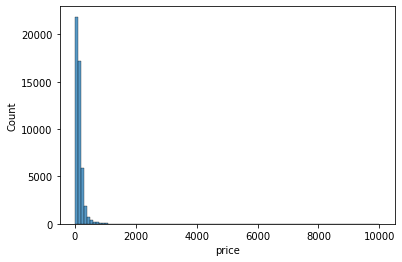

In [47]:
sns.histplot(df.price, bins=100)

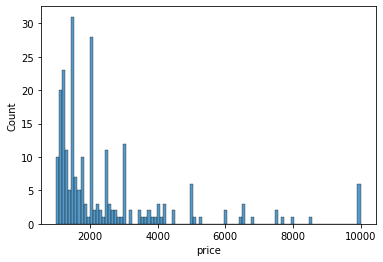

In [48]:
sns.histplot(df.price[df.price > 1000], bins=100)

Yes it has long tail.

In [49]:
price_logs = np.log1p(df.price)

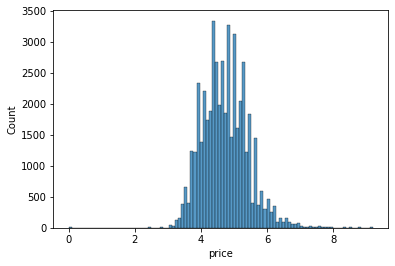

In [50]:
sns.histplot(price_logs, bins=100)

Missing values

In [39]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Question 1**: Number of missing values \
Find a feature with missing values. How many missing values does it have?

In [52]:
df_hw=df[['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']]

In [53]:
df_hw.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

reviews_per_month - 10052

**Question 2** \
What's the median (50% percentile) for variable 'minimum_nights'?

In [136]:
df_hw.minimum_nights.mean()

7.029962163820431

**Split the data** \
*   Shuffle the initial dataset, use seed 42.
*   Split your data in train/val/test sets, with 60%/20%/20% distribution.
*   Make sure that the target value ('price') is not in your dataframe.
*   Apply the log transformation to the price variable using the np.log1p() function.



In [187]:
n = len(df_hw)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [188]:
n_val, n_test, n_train

(9779, 9779, 29337)

In [189]:
idx = np.arange(n)

In [190]:
np.random.seed(42)
np.random.shuffle(idx)

In [191]:
df_train = df_hw.iloc[idx[:n_train]]
df_val = df_hw.iloc[idx[n_train:n_train+n_val]]
df_test = df_hw.iloc[idx[n_train+n_val:]]

In [192]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [193]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [194]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [195]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [196]:
del df_train['price']
del df_val['price']
del df_test['price']

In [197]:
df_train.iloc[10]

latitude                           40.75078
longitude                         -73.87949
minimum_nights                      1.00000
number_of_reviews                   4.00000
reviews_per_month                   2.11000
calculated_host_listings_count      4.00000
availability_365                  354.00000
Name: 10, dtype: float64

In [198]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

fillna = zero

In [199]:
df_train_zero = df_train
df_train_zero['reviews_per_month'].fillna(0,inplace=True)
X_train_zero = df_train_zero
df_val_zero = df_val
df_val_zero['reviews_per_month'].fillna(0,inplace=True)
x_val_zero = df_val_zero
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
y_pred_zero = w0_zero + x_val_zero.dot(w_zero)

fillna = mean

In [200]:
df_train_mean = df_train
df_train_mean['reviews_per_month'].fillna(df_train['reviews_per_month'].mean(),inplace=True)
X_train_mean = df_train_mean
df_val_mean = df_val
df_val_mean['reviews_per_month'].fillna(df_train['reviews_per_month'].mean(),inplace=True)
x_val_mean = df_val_mean
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w0_mean + x_val_mean.dot(w_mean)

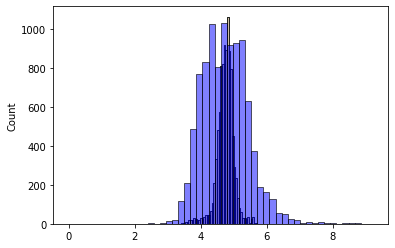

In [201]:
sns.histplot(y_pred_mean, color='red', alpha=0.2, bins=50)
sns.histplot(y_pred_zero, color='green', alpha=0.2, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

In [202]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [203]:
print('zero - ', rmse(y_val, y_pred_zero), '\n'
      'mean - ', rmse(y_val, y_pred_mean))

zero -  0.6430337788394748 
mean -  0.6430337788394748


Question 4
*   Now let's train a regularized linear regression.
*   For this question, fill the NAs with 0.
*   Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
*   Use RMSE to evaluate the model on the validation dataset.
*   Round the RMSE scores to 2 decimal digits.
*   Which r gives the best RMSE? 

If there are multiple options, select the smallest r.

In [125]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [167]:
X_train = X_train_zero
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  w0, w = train_linear_regression_reg(X_train, y_train, r=r)
  y_pred = w0 + x_val_zero.dot(w)
  print(f'for r= {r} \t rmse =',round(rmse(y_val, y_pred),2))

for r= 0 	 rmse = 0.64
for r= 1e-06 	 rmse = 0.64
for r= 0.0001 	 rmse = 0.64
for r= 0.001 	 rmse = 0.64
for r= 0.01 	 rmse = 0.65
for r= 0.1 	 rmse = 0.68
for r= 1 	 rmse = 0.68
for r= 5 	 rmse = 0.68
for r= 10 	 rmse = 0.68


**Question 5** \
*   We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
*   Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
*   For each seed, do the train/validation/test split with 60%/20%/20% distribution.
*   Fill the missing values with 0 and train a model without regularization.
*   For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
*   What's the standard deviation of all the scores? *   To compute the standard deviation, use np.std.
*   Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [211]:
list_rmse=[]
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  np.random.seed(seed=seed)
  np.random.shuffle(idx)
  df_train = df_hw.iloc[idx[:n_train]]
  df_val = df_hw.iloc[idx[n_train:n_train+n_val]]
  df_test = df_hw.iloc[idx[n_train+n_val:]]
  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)
  y_train = np.log1p(df_train.price.values)
  y_val = np.log1p(df_val.price.values)
  y_test = np.log1p(df_test.price.values)
  del df_train['price']
  del df_val['price']
  del df_test['price']
  df_train_zero = df_train
  df_train_zero['reviews_per_month'].fillna(0,inplace=True)
  X_train_zero = df_train_zero
  df_val_zero = df_val
  df_val_zero['reviews_per_month'].fillna(0,inplace=True)
  x_val_zero = df_val_zero
  w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
  y_pred_zero = w0_zero + x_val_zero.dot(w_zero)
  rmse_value = rmse(y_val, y_pred_zero)
  list_rmse.append(rmse_value)
  print(f'seed = {seed} \t rmse =', rmse_value)

print('STD RMSE =', round(np.std(list_rmse),3))

seed = 0 	 rmse = 0.6416856765657515
seed = 1 	 rmse = 0.6377466012404271
seed = 2 	 rmse = 0.660606676381699
seed = 3 	 rmse = 0.6475267749931741
seed = 4 	 rmse = 0.6336296341703395
seed = 5 	 rmse = 0.6449202271732847
seed = 6 	 rmse = 0.633721241135546
seed = 7 	 rmse = 0.6436784541301908
seed = 8 	 rmse = 0.641397747834323
seed = 9 	 rmse = 0.6429286006744828
STD RMSE = 0.007


**Question 6** \
*   Split the dataset like previously, use seed 9.
*   Combine train and validation datasets.
*   Fill the missing values with 0 and train a model with r=0.001.
*   What's the RMSE on the test dataset?

In [224]:
np.random.seed(seed=9)
np.random.shuffle(idx)
df_train = df_hw.iloc[idx[:n_train]]
df_val = df_hw.iloc[idx[n_train:n_train+n_val]]
df_test = df_hw.iloc[idx[n_train+n_val:]]
df_full_train = pd.concat([df_train, df_val])

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']
del df_full_train['price']

y_full_train = np.concatenate([y_train, y_val])

df_train_zero = df_full_train
df_train_zero['reviews_per_month'].fillna(0,inplace=True)
X_train_zero = df_train_zero
df_val_zero = df_test
df_val_zero['reviews_per_month'].fillna(0,inplace=True)
x_val_zero = df_val_zero
w0_zero, w_zero = train_linear_regression_reg(X_train_zero, y_full_train, r=0.001)
y_pred_zero = w0_zero + x_val_zero.dot(w_zero)
rmse_value = rmse(y_test, y_pred_zero)
print(f'seed = {seed} \t rmse =', rmse_value)

seed = 9 	 rmse = 0.6515396106393905
